<a href="https://colab.research.google.com/github/wisnubadrani/MSIB-Orbit-Ai4Jobs/blob/main/Haarcascade_Jumatec_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import OpenCV untuk implementasi Haar Cascade
Detail apa saja yang disediakan oleh opencv untuk cascade classifier itu bisa dilihat di dokumentasi opencv https://docs.opencv.org/4.x/
<br>
Referensi tambahan untuk Cascade Classifier di OpenCV:
- https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
- https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html

In [ ]:
#kita akan gunakan haarcascade yang sudah ada
#download haarcascade classifier

!gdown "1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J"

Downloading...
From: https://drive.google.com/uc?id=1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J
To: /content/haarcascades.zip
100% 1.46M/1.46M [00:00<00:00, 192MB/s]


In [ ]:
#kita akan extract zip file yang berisi cascade classifier yang sudah didownload sebelumnya
!unzip "/content/haarcascades.zip"

Archive:  /content/haarcascades.zip
  inflating: haarcascade_eye.xml     
  inflating: haarcascade_eye_tree_eyeglasses.xml  
  inflating: haarcascade_frontalcatface.xml  
  inflating: haarcascade_frontalcatface_extended.xml  
  inflating: haarcascade_frontalface_alt.xml  
  inflating: haarcascade_frontalface_alt_tree.xml  
  inflating: haarcascade_frontalface_alt2.xml  
  inflating: haarcascade_frontalface_default.xml  
  inflating: haarcascade_fullbody.xml  
  inflating: haarcascade_lefteye_2splits.xml  
  inflating: haarcascade_licence_plate_rus_16stages.xml  
  inflating: haarcascade_lowerbody.xml  
  inflating: haarcascade_profileface.xml  
  inflating: haarcascade_righteye_2splits.xml  
  inflating: haarcascade_russian_plate_number.xml  
  inflating: haarcascade_smile.xml   
  inflating: haarcascade_upperbody.xml  


In [ ]:
#download library extension opencv yang lebih lengkap supaya bisa akses fitur haarcascade yang lebih lengkap
!wget -c "https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py" -O "common.py"

--2022-10-13 02:20:32--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6572 (6.4K) [text/plain]
Saving to: ‘common.py’

common.py           100%[===================>]   6.42K  --.-KB/s    in 0s      

2022-10-13 02:20:32 (55.2 MB/s) - ‘common.py’ saved [6572/6572]



### Import Library yang akan digunakan
- OpenCV
- Numpy
- Matplotlib

In [ ]:
#import library
import cv2 #opencv
import numpy as np
import common #ini adalah extension yang sebelumnya kita download
import matplotlib.pyplot as plt

### Mencoba menggunakan Cascade Classifier

In [ ]:
#download bahan image
!wget -c "https://images.unsplash.com/photo-1588979355313-6711a095465f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=672&q=80" -O "family1.png"
!wget -c "https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg" -O "family2.png"

--2022-10-13 02:26:36--  https://images.unsplash.com/photo-1588979355313-6711a095465f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=672&q=80
Resolving images.unsplash.com (images.unsplash.com)... 199.232.46.208, 2a04:4e42:48::720
Connecting to images.unsplash.com (images.unsplash.com)|199.232.46.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98959 (97K) [image/jpeg]
Saving to: ‘family1.png’

family1.png         100%[===================>]  96.64K  --.-KB/s    in 0.002s  

2022-10-13 02:26:37 (55.0 MB/s) - ‘family1.png’ saved [98959/98959]

--2022-10-13 02:26:37--  https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg
Resolving res.klook.com (res.klook.com)... 13.227.254.88, 13.227.254.4, 13.227.254.34, ...
Connecting to res.klook.com (res.klook.com)|13.227.254.88|:443..

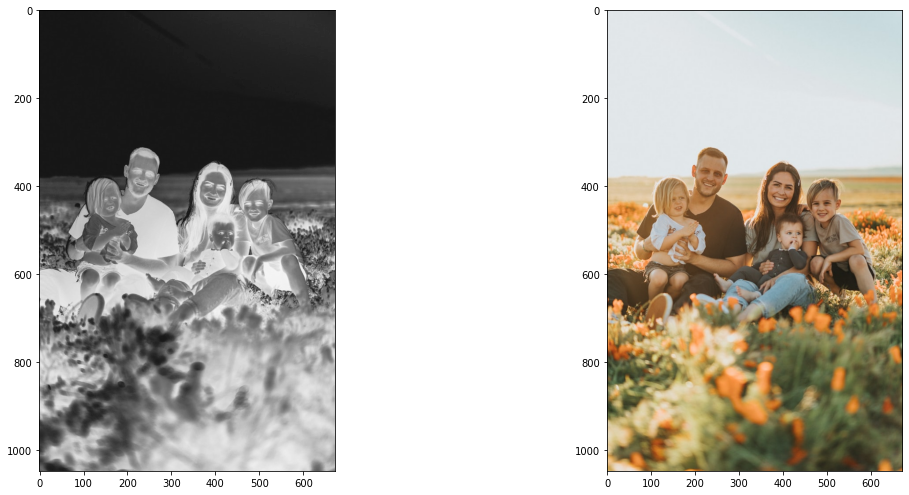

In [ ]:
#coba load image 1
base_image = cv2.imread("/content/family1.png")
gray_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY) #kita convert ke image hitam putih untuk didetect oleh cascade classifier
rgb_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB) #kita akan gunakan untuk nampilin image dalam bentuk warna

plt.figure(figsize = (100,100))
plt.subplot(10,10, 1)
plt.imshow(gray_image, cmap= "Greys")

plt.subplot(10,10, 2)
plt.imshow(rgb_image)
plt.show()

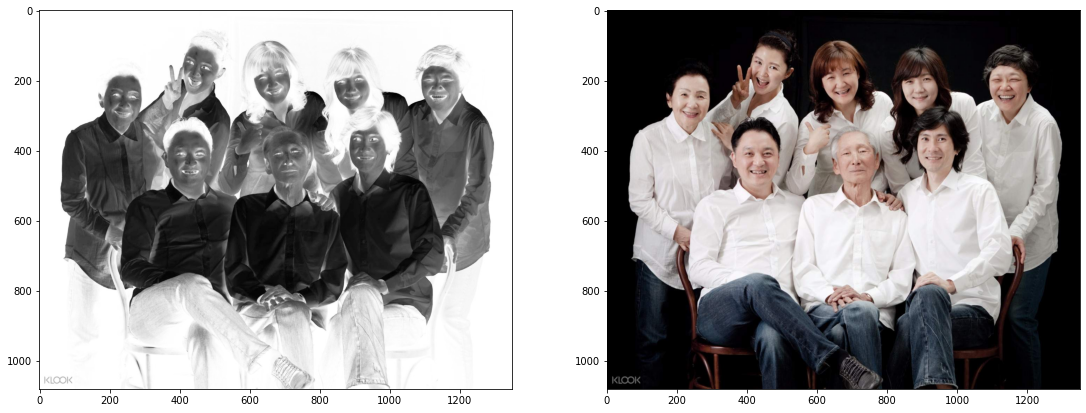

In [ ]:
#coba load image 2
base_image = cv2.imread("/content/family2.png")
gray_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY) #kita convert ke image hitam putih untuk didetect oleh cascade classifier
rgb_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB) #kita akan gunakan untuk nampilin image dalam bentuk warna

plt.figure(figsize = (100,100))
plt.subplot(10,10, 1)
plt.imshow(gray_image, cmap= "Greys")

plt.subplot(10,10, 2)
plt.imshow(rgb_image)
plt.show()

### Pakai Face Detection Classifier
- haarcascade_frontalface_default.xml

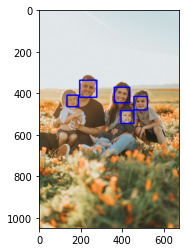

In [ ]:
test_image_family1 = cv2.imread("/content/family1.png") #load reference image yang akan didetect
test_image_family1_grey = cv2.cvtColor(test_image_family1, cv2.COLOR_BGR2GRAY) #convert to gray image

#load face classifier
face_classifier = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
faces = face_classifier.detectMultiScale(test_image_family1_grey, 1.2, 5) #ngebuat prediksi dari classifier yang kita buat

for (x,y,w,h) in faces:
  cv2.rectangle(test_image_family1, (x,y), (x+w, y+h), (255,0,0), 5) #bikin bounding box

result = cv2.cvtColor(test_image_family1, cv2.COLOR_BGR2RGB)
plt.imshow(result)


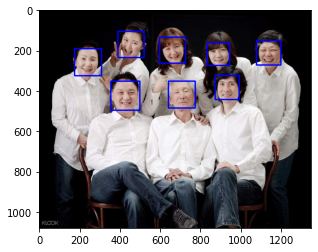

In [ ]:
test_image_family2 = cv2.imread("/content/family2.png") #load reference image yang akan didetect
test_image_family2_grey = cv2.cvtColor(test_image_family2, cv2.COLOR_BGR2GRAY) #convert to gray image

#load face classifier
face_classifier = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
faces = face_classifier.detectMultiScale(test_image_family2_grey, 1.2, 5) #ngebuat prediksi dari classifier yang kita buat

for (x,y,w,h) in faces:
  cv2.rectangle(test_image_family2, (x,y), (x+w, y+h), (255,0,0), 5) #bikin bounding box

result = cv2.cvtColor(test_image_family2, cv2.COLOR_BGR2RGB)
plt.imshow(result)


### Pakai Smile Detection Classifier
- haarcascade_smile.xml

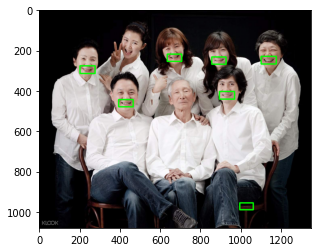

In [ ]:
test_image_family = cv2.imread("/content/family2.png") #load reference image yang akan didetect
test_image_family_grey = cv2.cvtColor(test_image_family, cv2.COLOR_BGR2GRAY) #convert to gray image

#load smile classifier
smile_classifier = cv2.CascadeClassifier("/content/haarcascade_smile.xml")
smiles = smile_classifier.detectMultiScale(test_image_family_grey, 1.3, 23) #ngebuat prediksi dari classifier yang kita buat

for (x,y,w,h) in smiles:
  cv2.rectangle(test_image_family, (x,y), (x+w, y+h), (0,255,0), 5) #bikin bounding box

result = cv2.cvtColor(test_image_family, cv2.COLOR_BGR2RGB)
plt.imshow(result)


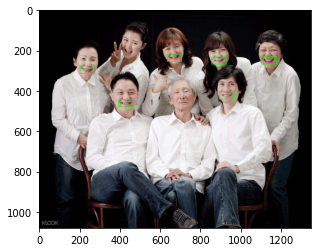

In [ ]:
#karena masih ada komponen false positive, maka kita akan lakukan penggabungan classifier faces dan smile
#karna smile kan ada didalam faces

test_image_family = cv2.imread("/content/family2.png") #load reference image yang akan didetect
test_image_family_grey = cv2.cvtColor(test_image_family, cv2.COLOR_BGR2GRAY) #convert to gray image

#load face classifier
face_classifier = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
faces = face_classifier.detectMultiScale(test_image_family_grey, 1.2, 5) #ngebuat prediksi dari classifier yang kita buat

#load smile classifier
smile_classifier = cv2.CascadeClassifier("/content/haarcascade_smile.xml")
smiles = smile_classifier.detectMultiScale(test_image_family_grey, 1.3, 23) #ngebuat prediksi dari classifier yang kita buat


#get dan bikin rectangle faces dulu
for (x,y,w,h) in faces:
  for(x_s, y_s, w_s, h_s) in smiles:
    if((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
      cv2.rectangle(test_image_family, (x_s, y_s), (x_s+w_s, y_s+h_s), (0,255,0), 2)

result = cv2.cvtColor(test_image_family, cv2.COLOR_BGR2RGB)
plt.imshow(result)



### Pakai Eye Detection Classifier
- haarcascade_eye.xml

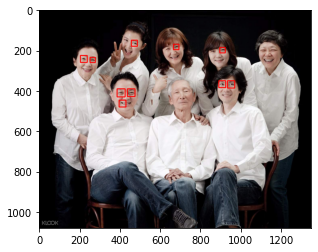

In [ ]:
test_image_family = cv2.imread("/content/family2.png") #load reference image yang akan didetect
test_image_family_grey = cv2.cvtColor(test_image_family, cv2.COLOR_BGR2GRAY) #convert to gray image

#load eye classifier
eye_classifier = cv2.CascadeClassifier("/content/haarcascade_eye.xml")
eyes = eye_classifier.detectMultiScale(test_image_family_grey, 1.1, 23) #ngebuat prediksi dari classifier yang kita buat

for (x,y,w,h) in eyes:
  cv2.rectangle(test_image_family, (x,y), (x+w, y+h), (0,0,255), 3) #bikin bounding box

result = cv2.cvtColor(test_image_family, cv2.COLOR_BGR2RGB)
plt.imshow(result)


### Menggabungkan semua classifier jadi satu

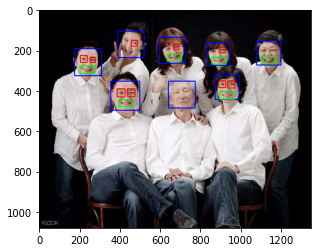

In [ ]:
test_image_family = cv2.imread("/content/family2.png") #load reference image yang akan didetect
test_image_family_grey = cv2.cvtColor(test_image_family, cv2.COLOR_BGR2GRAY) #convert to gray image

#load face classifier
face_classifier = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
faces = face_classifier.detectMultiScale(test_image_family_grey, 1.2, 5) #ngebuat prediksi dari classifier yang kita buat

#load smile classifier
smile_classifier = cv2.CascadeClassifier("/content/haarcascade_smile.xml")
smiles = smile_classifier.detectMultiScale(test_image_family_grey, 1.3, 23) #ngebuat prediksi dari classifier yang kita buat

#load eye classifier
eye_classifier = cv2.CascadeClassifier("/content/haarcascade_eye.xml")
eyes = eye_classifier.detectMultiScale(test_image_family_grey, 1.1, 25) #ngebuat prediksi dari classifier yang kita buat

for (x,y,w,h) in faces:
  cv2.rectangle(test_image_family, (x,y), (x+w,y+h), (255,0,0), 3)

  for (x_s,y_s,w_s,h_s) in smiles:
    if((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
      cv2.rectangle(test_image_family, (x_s,y_s), (x_s+w_s, y_s+h_s), (0,255,0), 3)

  for (x_e,y_e,w_e,h_e) in eyes:
    if((x <= x_e) and (y <= y_e) and (x+w >= x_e+w_e) and (y+h >= y_e+h_e)):
      cv2.rectangle(test_image_family, (x_e,y_e), (x_e+w_e, y_e+h_e), (0,0,255), 3)

result = cv2.cvtColor(test_image_family, cv2.COLOR_BGR2RGB)
plt.imshow(result)


### Tugas Nomor 1
Download gambar dari link di bawah ini menggunakan wget.

https://web.kominfo.go.id/sites/default/files/kominfo-setkab-jokowi-Kabinet-Indonesia-Maju-1.jpg

Buatlah deteksi wajah dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi semua wajah dari gambar tersebut
<br>

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.

### Tugas Nomor 2
Download gambar dari link di bawah ini menggunakan wget.

https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg

Buatlah deteksi plat nomor mobil dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi plat nomor dari 3 mobil terdepan 

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.